### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [6]:
data = pd.read_csv("iris_data.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
data.shape

(150, 5)

In [10]:
data.shape[0]

150

In [12]:
data.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [14]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [19]:
data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [24]:
stats_df = data.describe()

In [28]:
stats_df.loc["range"] = stats_df.loc["max"] - stats_df.loc["min"]

In [30]:
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


### Obtain the groupwise mean and median

In [33]:
data.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [35]:
data.groupby("species").median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [37]:
data.groupby("species").agg(["mean", "median"])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [43]:
agg_dict = {field: ["mean", "median"] for field in data.columns if field != "species"}

In [45]:
agg_dict

{'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median'],
 'petal_length': ['mean', 'median'],
 'petal_width': ['mean', 'median']}

In [47]:
data.groupby("species").agg(agg_dict)

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

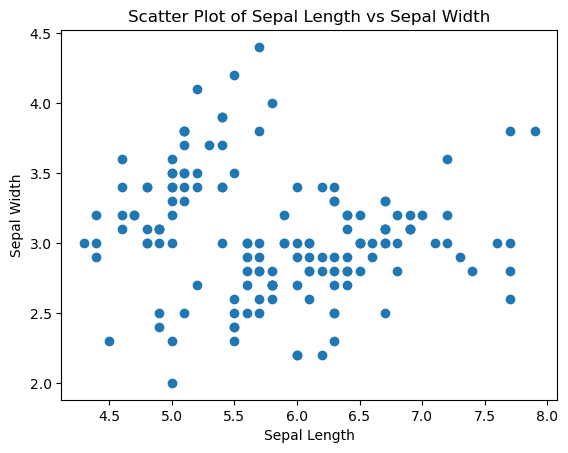

In [49]:
plt.scatter(data["sepal_length"], data["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.show()

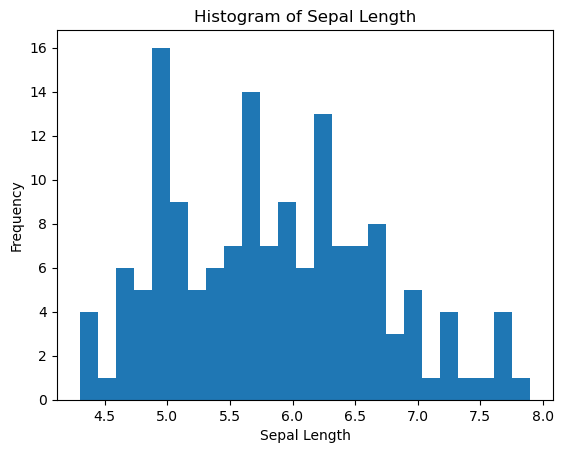

In [55]:
plt.hist(data["sepal_length"], bins = 25)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")
plt.show()

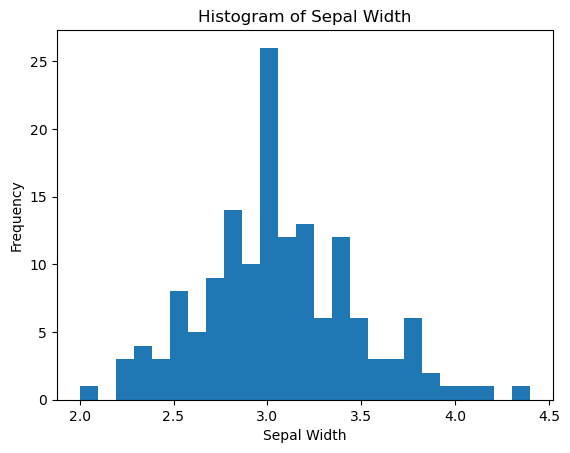

In [57]:
plt.hist(data["sepal_width"], bins = 25)
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Width")
plt.show()

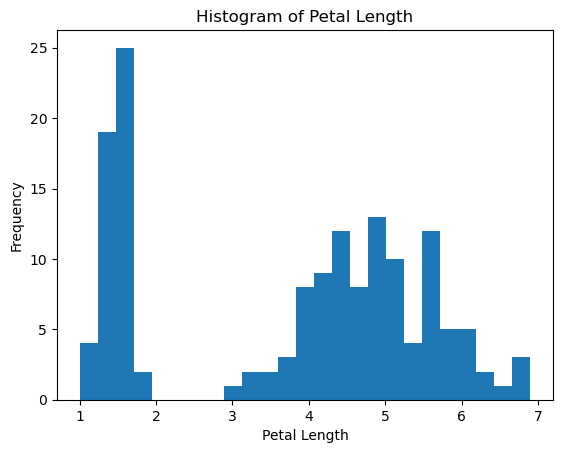

In [65]:
plt.hist(data["petal_length"], bins = 25)
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Length")
plt.show()

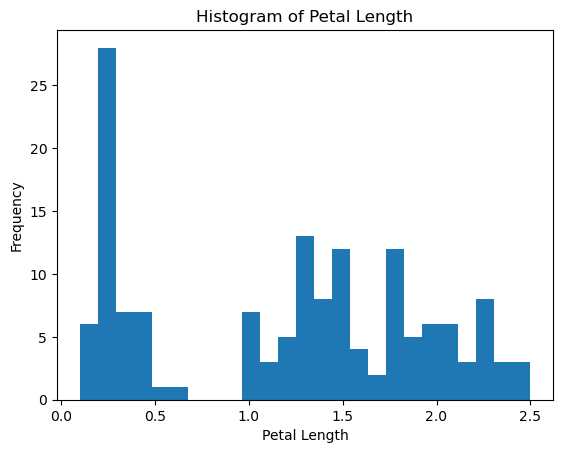

In [67]:
plt.hist(data["petal_width"], bins = 25)
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Length")
plt.show()

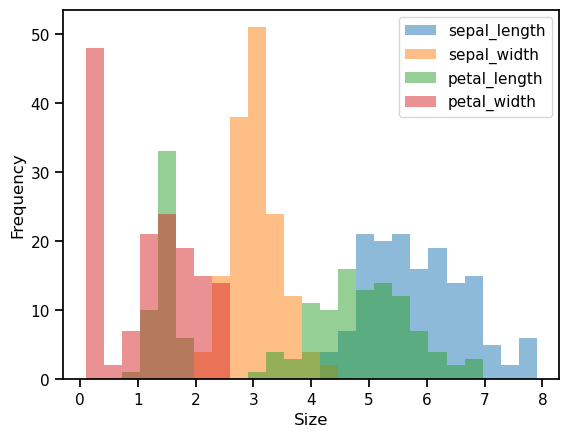

In [69]:
sns.set_context("notebook")
data.plot.hist(bins = 25, alpha = 0.5)
plt.xlabel("Size")
plt.show()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

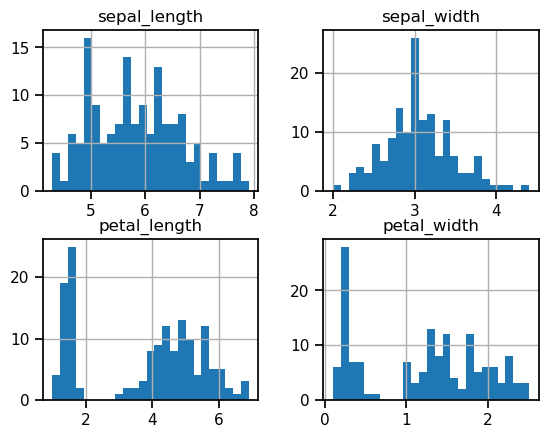

In [73]:
axList = data.hist(bins = 25)
axList

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

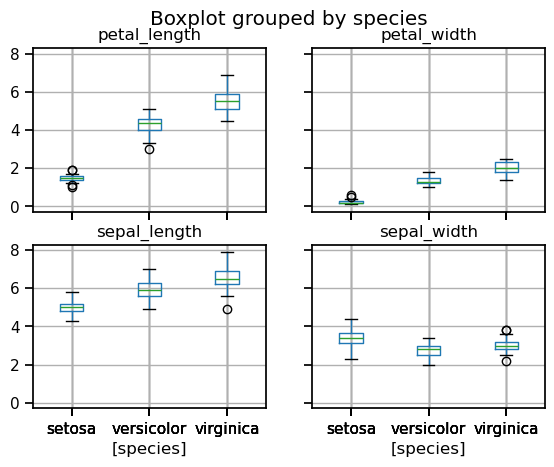

In [75]:
data.boxplot(by = "species")

In [77]:
plot_data = (data
            .set_index("species")
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns = {0: "size", "level_1": "measurement"}))

In [79]:
plot_data

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


<Axes: xlabel='measurement', ylabel='size'>

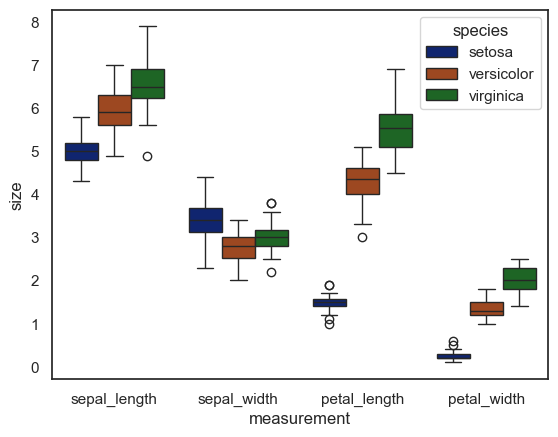

In [81]:
sns.set_context("notebook")
sns.set_style("white")
sns.set_palette("dark")
sns.boxplot(x = "measurement", y = "size", hue = "species", data = plot_data)

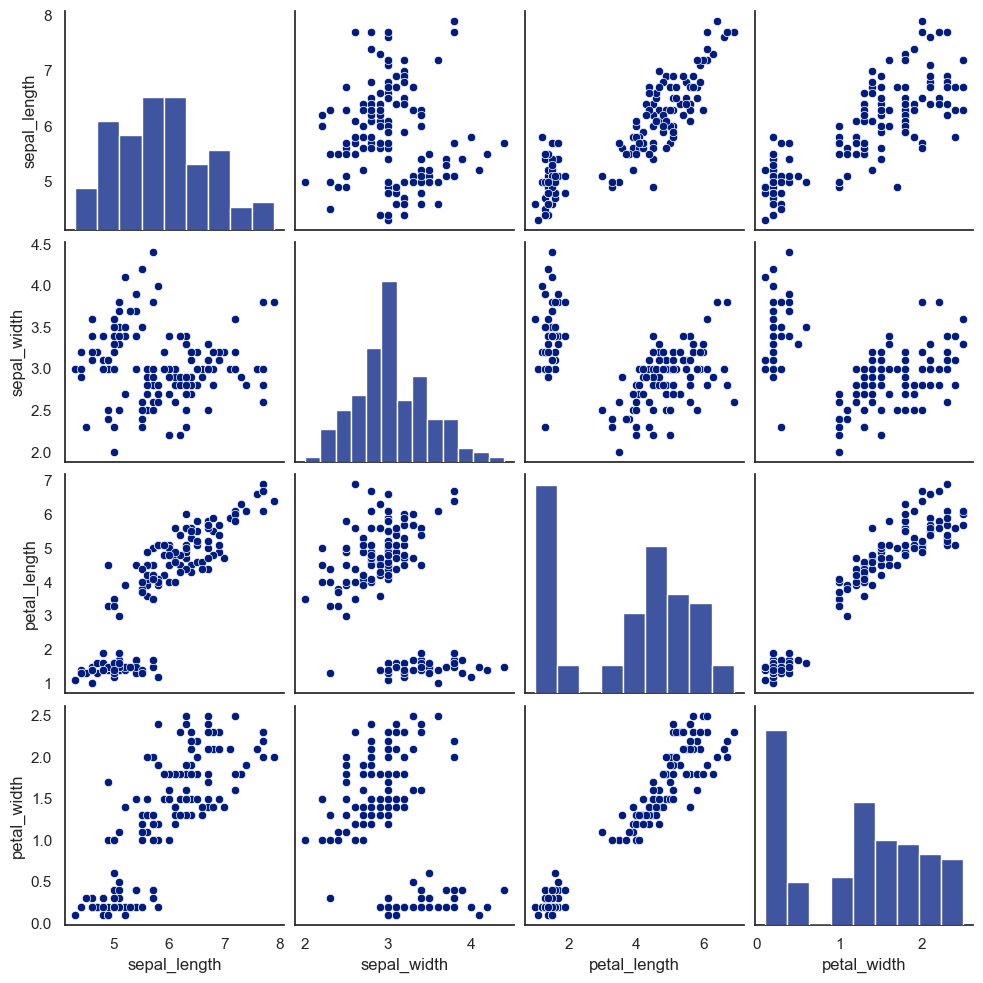

In [83]:
sns.pairplot(data)